# Predictive Modelling and Analysis of Airfare trends & Ticket 

# About Dataset

Airline- The name of the airline company

Date_of_Journey- The date on which the journey happened

Source- The city of the departure of the flight

Destination- The destination city/airport

Route- The route of the flight from where to where

Dep_Time- The departure time of the flight

Arrival_Time- The time of the arrival of the flight to the destination

Duration- The duration of the flight

Total_Stops- Total number of stops during the journey

Additional_Info- Extra/Additional information regarding flight/travel

Price- The price of the ticket for a single journey

# Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r'C:\Users\new\Desktop\python files\datasets\Data.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,Null,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,Null,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,Null,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,Null,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,Null,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,Null,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,Null,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,Null,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,Null,12648


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.isnull().sum()
# As Additional_Info has null values but still it is taking up as non-null.

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.dropna(inplace = True)

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
print(df['Additional_Info'].unique())

['Null ' 'Null' 'In-flight meal not included'
 'No check-in baggage included' '1 Short layover' '1 Long layover'
 'Change airports' 'Business class' 'Red-eye flight' '2 Long layover']


In [8]:
null_count = df['Additional_Info'].str.count('Null ').sum() + df['Additional_Info'].str.count('Null').sum()
print(f'Total null values in Additional_Info row: {null_count}')

Total null values in Additional_Info row: 8348


In [9]:
8348 / 10683 * 100

78.14284377047646

In [10]:
df.drop(['Additional_Info'], inplace  = True, axis = 1)
# Dropping Additinal Info column would be beneficial because it contains more than 75% null values

In [11]:
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


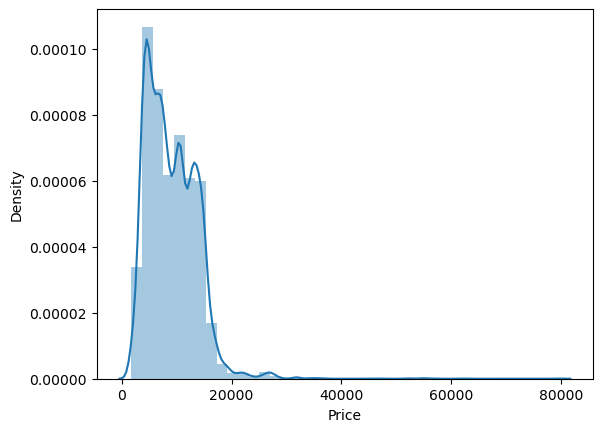

In [12]:
plt.figsize = (10, 8)
sns.distplot(df['Price'], kde = True, hist = True, bins = 40)
plt.xlabel('Price')
plt.show()
# Highly Skewed Data

In [13]:
uni = df['Airline'].unique()
print(uni)

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


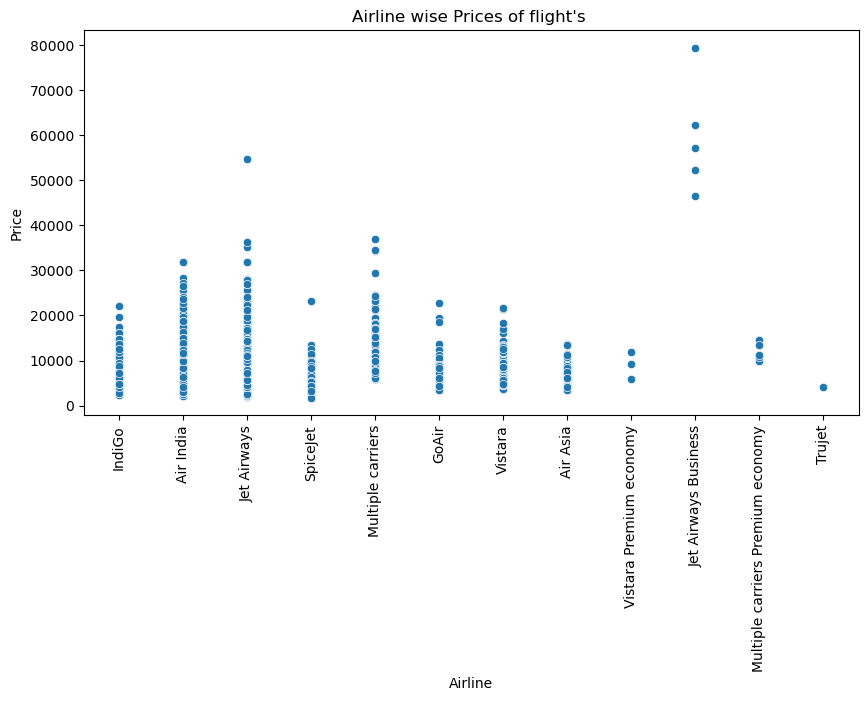

In [14]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'Airline', y = 'Price', data = df)
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title("Airline wise Prices of flight's ")
plt.xticks(rotation = 90)
plt.show()

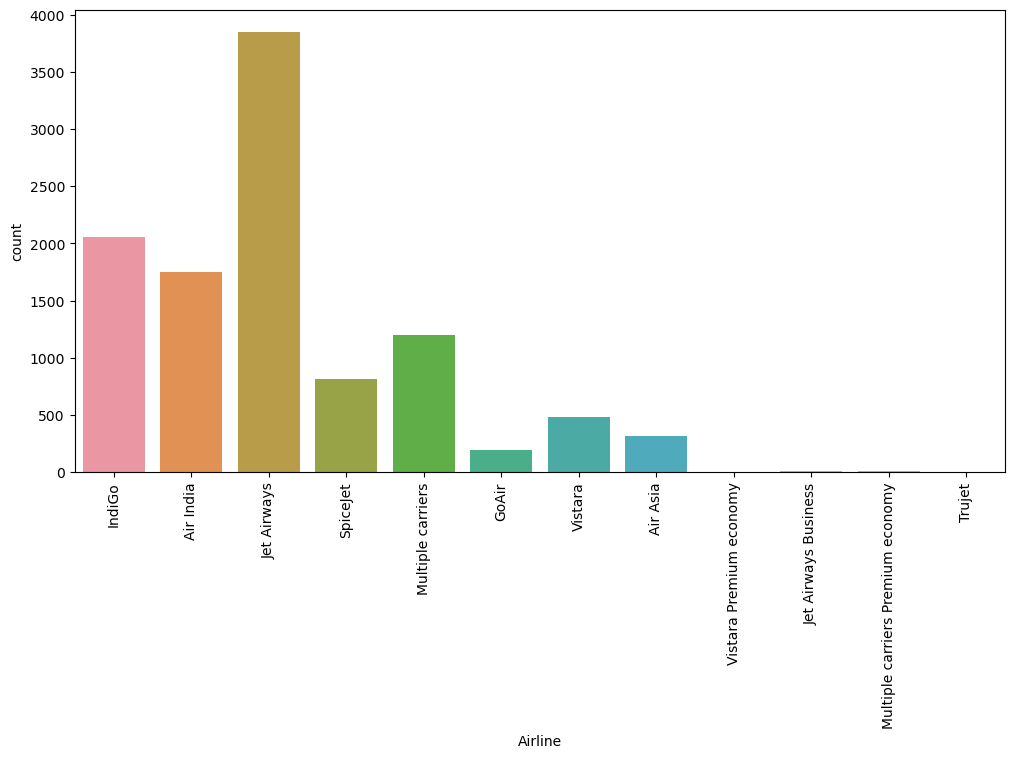

In [15]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Airline', data = df)
plt.xticks(rotation= 90)

plt.show()

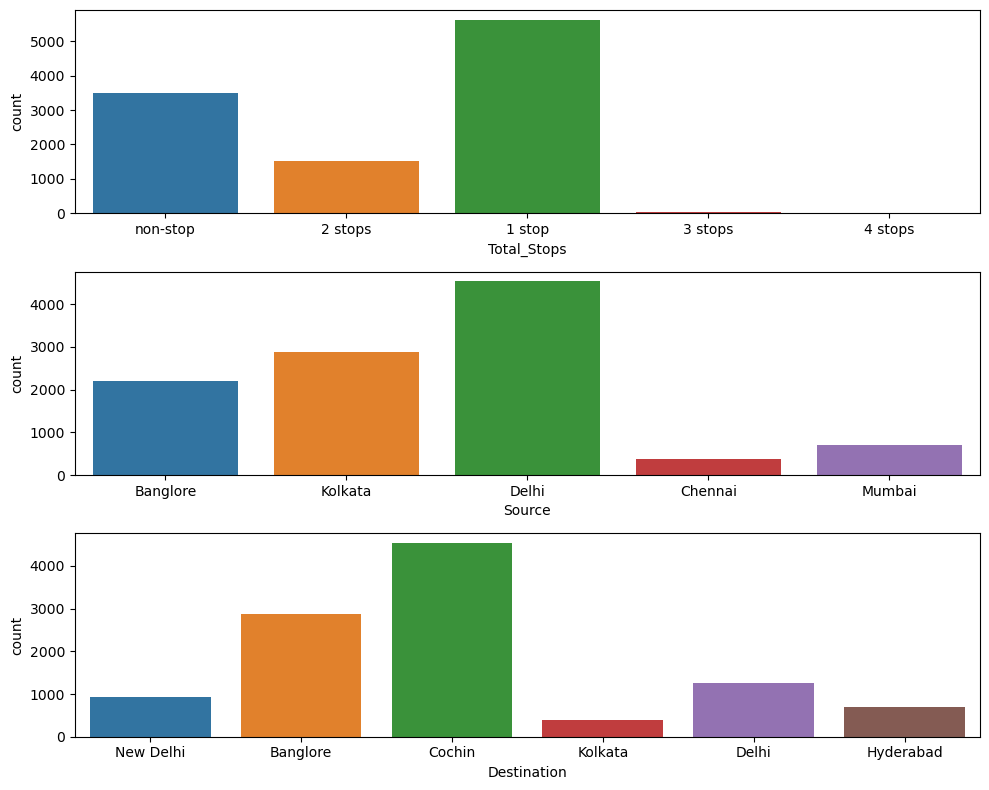

In [16]:
f, axes = plt.subplots(nrows = 3, figsize = (10,8))

sns.countplot(x = 'Total_Stops', data = df, ax = axes[0])

sns.countplot(x = 'Source', data = df, ax = axes[1])

sns.countplot(x = 'Destination', data = df, ax = axes[2])


plt.tight_layout()
plt.show()

# People tend to take up more either non-stop or 1-stop flight
# Most people are flying from Delhi
# Jet Airways, Indigo and Air India are top 3 airlines amongst all the airlines

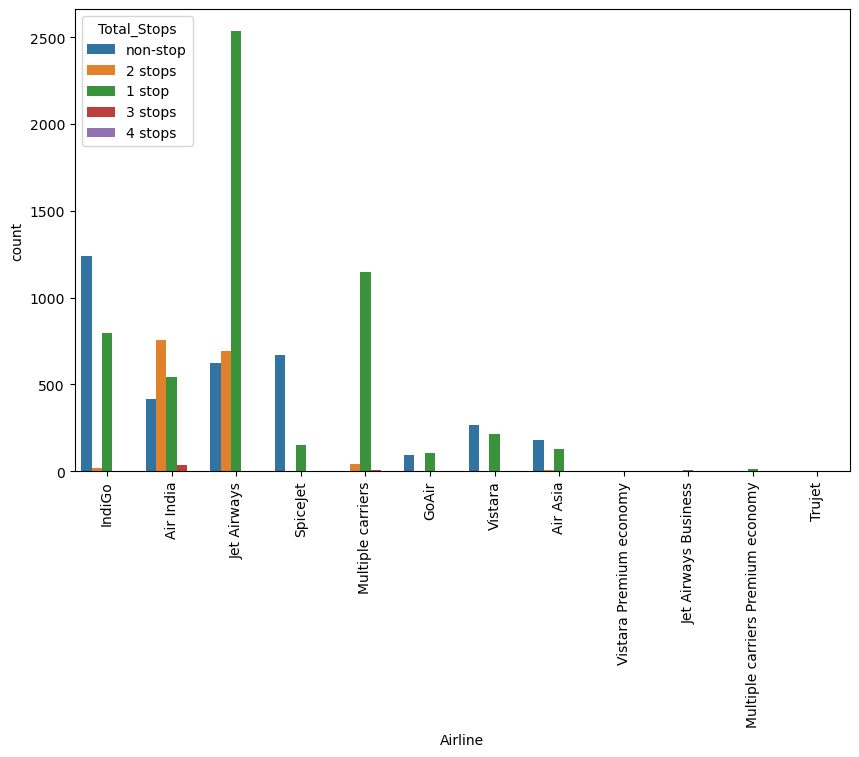

In [17]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Airline', hue = 'Total_Stops', data = df)
plt.xticks(rotation = 90)
plt.show()

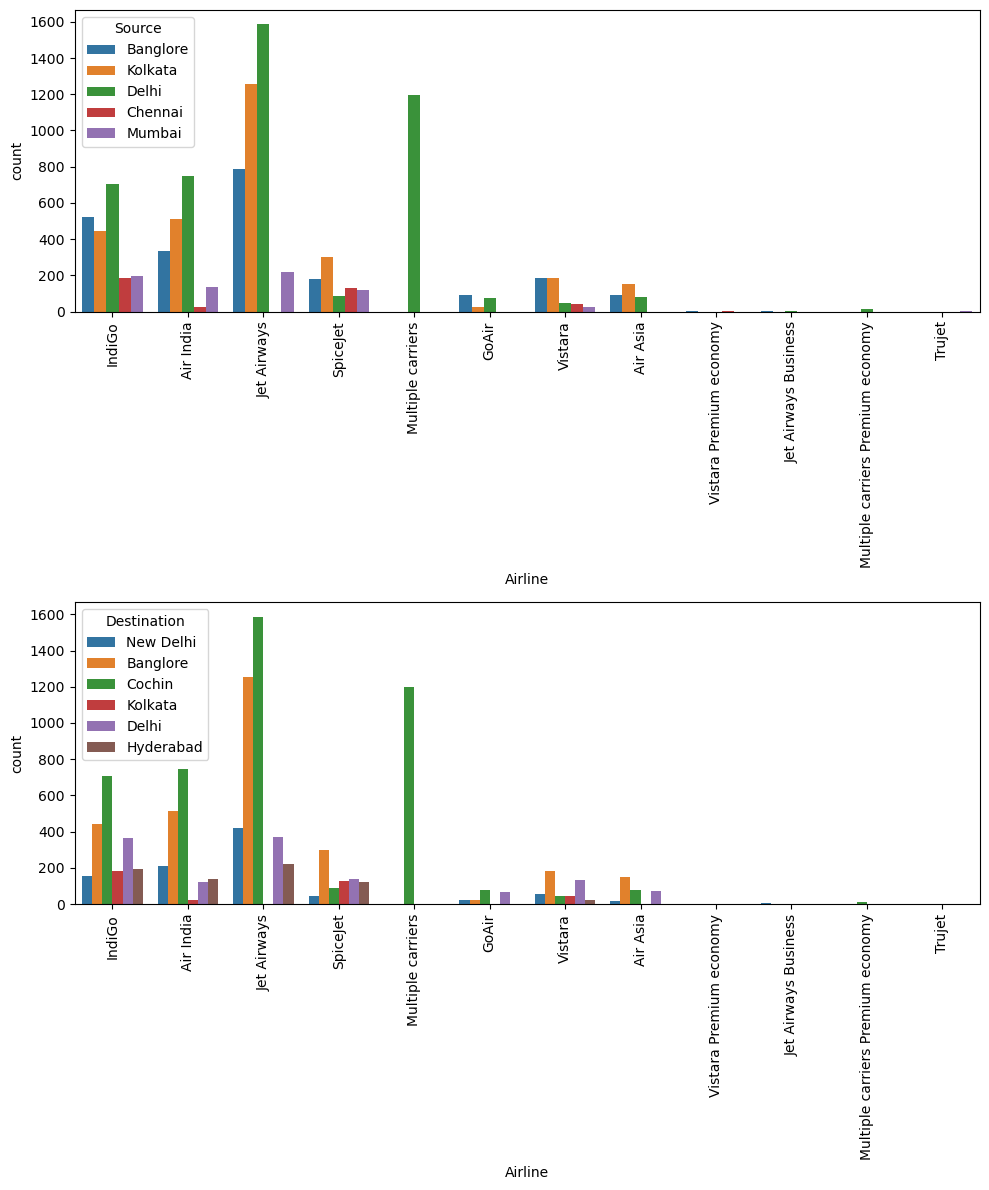

In [18]:
f, axes = plt.subplots(nrows = 2, figsize = (10, 12))
sns.countplot(x = 'Airline', hue = 'Source', data = df, ax = axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 90)

sns.countplot(x = 'Airline', hue = 'Destination', data = df, ax = axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 90)

plt.tight_layout()
plt.show()

In [19]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format = '%d/%m/%Y')


df['Day'] = df['Date_of_Journey'].dt.day
df['Month'] = df['Date_of_Journey'].dt.month
df['Year'] = df['Date_of_Journey'].dt.year

df.head()

# Converting date's into Date Time Object

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,2019
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,12,5,2019
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1,3,2019


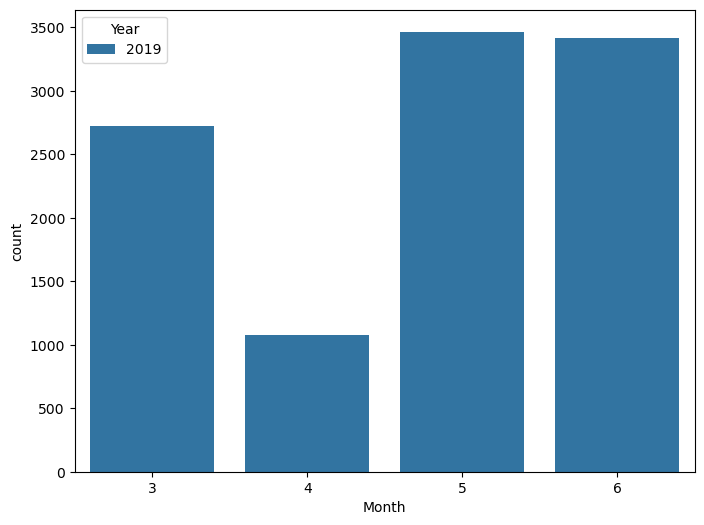

In [20]:
plt.figure(figsize = (8,6))
sns.countplot(x = 'Month', hue = 'Year', data = df)
plt.show()

# We have only 4 months of data

In [21]:
def deptimeconversion(dep_time):
    dep_time_new = dep_time.replace(':', '.')
    dep_time_float = float(dep_time_new)
    
    if 4.00 <= dep_time_float <= 11.59:
        return'Morning'
    elif 12.00 <= dep_time_float <= 18.00:
        return 'Afternoon'
    elif 18.00 <= dep_time_float <= 23.59:
        return 'Evening'
    elif 0.00 <= dep_time_float <= 4.00:
        return 'Night'
    else:
        return 'Unknown'

# Converting Departure Time into catrgories 'Morning', 'Evening', 'Afternoon' and 'Night'

In [22]:
df['Dep_Period'] = df['Dep_Time'].apply(deptimeconversion)
df['Dep_Period'].value_counts()

Morning      5081
Evening      2688
Afternoon    2618
Night         295
Name: Dep_Period, dtype: int64

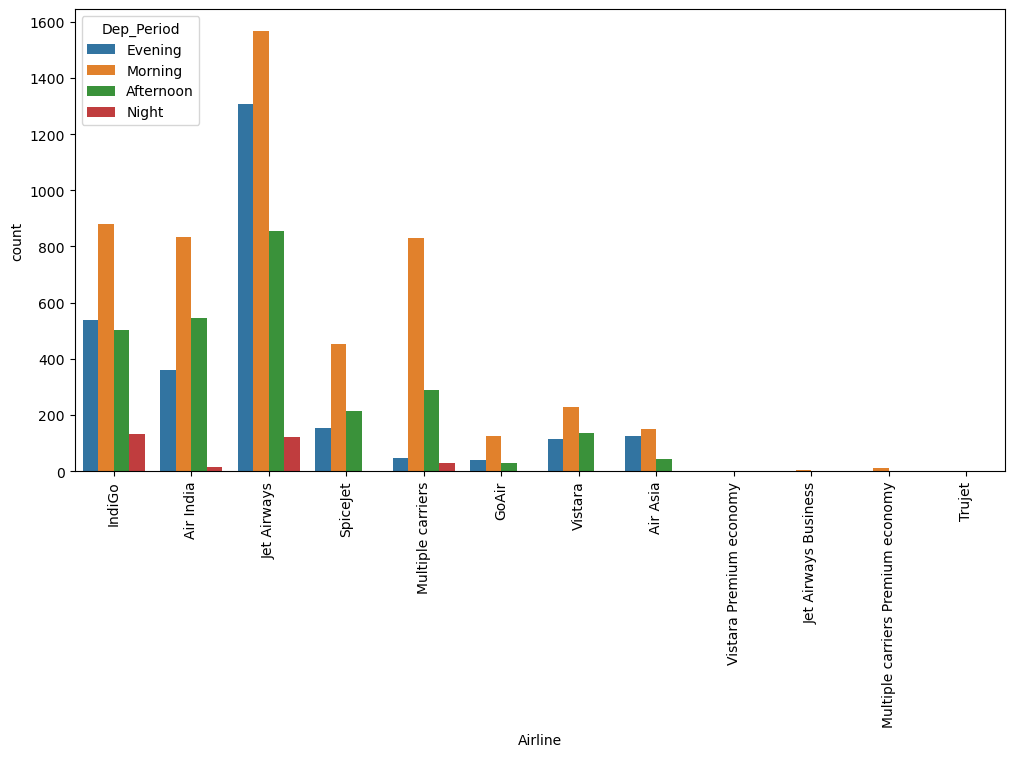

In [23]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Airline', hue = 'Dep_Period', data = df)
plt.xticks(rotation = 90)
plt.show()

# People are tend to fly most probably in 'Morning', 'Afternoon' and 'Evening'

In [24]:
def extract_time(time_str):
    return time_str.split(' ')[0]
df['Arrival_Time'] = df['Arrival_Time'].apply(extract_time)

# As arrival time had date as well so we have to extract only time

In [25]:
def arrtimeconversion(arr_time):
    arr_time_new = arr_time[0:5].replace(':', '.')
    arr_time_float = float(arr_time_new)
    
    if 4.00 <= arr_time_float <= 11.59:
        return'Morning'
    elif 12.00 <= arr_time_float <= 18.00:
        return 'Afternoon'
    elif 18.00 <= arr_time_float <= 23.59:
        return 'Evening'
    elif 0.00 <= arr_time_float <= 4.00:
        return 'Night'
    else:
        return 'Unknown'
    
# Converting Arrival Time into catrgories 'Morning', 'Evening', 'Afternoon' and 'Night'

In [26]:
df['Arr_Period'] = df['Arrival_Time'].apply(arrtimeconversion)
df['Arr_Period'].value_counts()

Evening      4311
Morning      3110
Afternoon    2284
Night         977
Name: Arr_Period, dtype: int64

In [27]:
def minute_conversion(duration):
    
    total_min = 0
    
    time_parts = duration.split()
    
    for i in time_parts:
        if 'h' in i:
            total_min += int(i.replace('h', ''))*60
        elif 'm'in i:
            total_min += int(i.replace('m', ''))
    return total_min

# Converting duration hours into only minutes

In [28]:
df['Duration_min'] = df['Duration'].apply(minute_conversion)
df['Duration_min']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_min, Length: 10682, dtype: int64

In [29]:
df['Total_Stops'] = df['Total_Stops'].apply(lambda x : x.split(' ')[0])

In [30]:
df['Total_Stops'] = df['Total_Stops'].replace('non-stop', '0')
df['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: object

In [31]:
airline_avg_prices = df.groupby('Airline')['Price'].mean()

for i in airline_avg_prices.index:
    avg_price = airline_avg_prices[i]
    print(f'{i} : {avg_price : .2f}')

Air Asia :  5590.26
Air India :  9612.43
GoAir :  5861.06
IndiGo :  5673.68
Jet Airways :  11643.92
Jet Airways Business :  58358.67
Multiple carriers :  10902.68
Multiple carriers Premium economy :  11418.85
SpiceJet :  4338.28
Trujet :  4140.00
Vistara :  7796.35
Vistara Premium economy :  8962.33


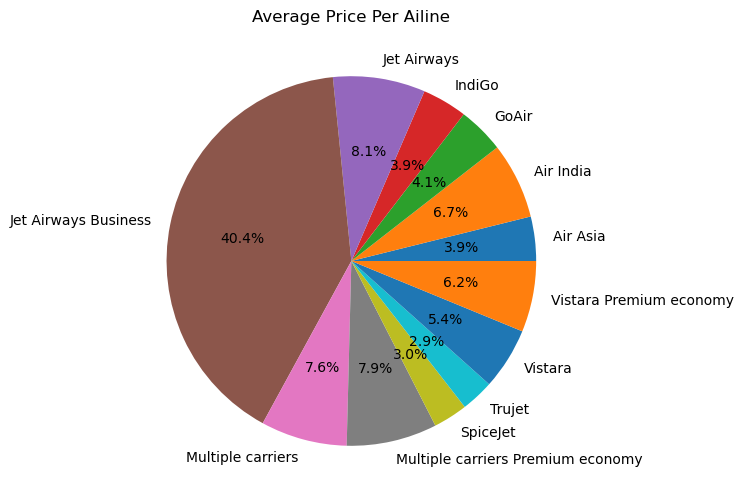

In [32]:
plt.figure(figsize = (10,6))
plt.pie(airline_avg_prices, labels = airline_avg_prices.index, autopct = '%1.1f%%')
plt.title('Average Price Per Ailine')
plt.show()

In [33]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Year,Dep_Period,Arr_Period,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,3897,24,3,2019,Evening,Night,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,7662,1,5,2019,Morning,Afternoon,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,13882,9,6,2019,Morning,Morning,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,6218,12,5,2019,Evening,Evening,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,13302,1,3,2019,Afternoon,Evening,285


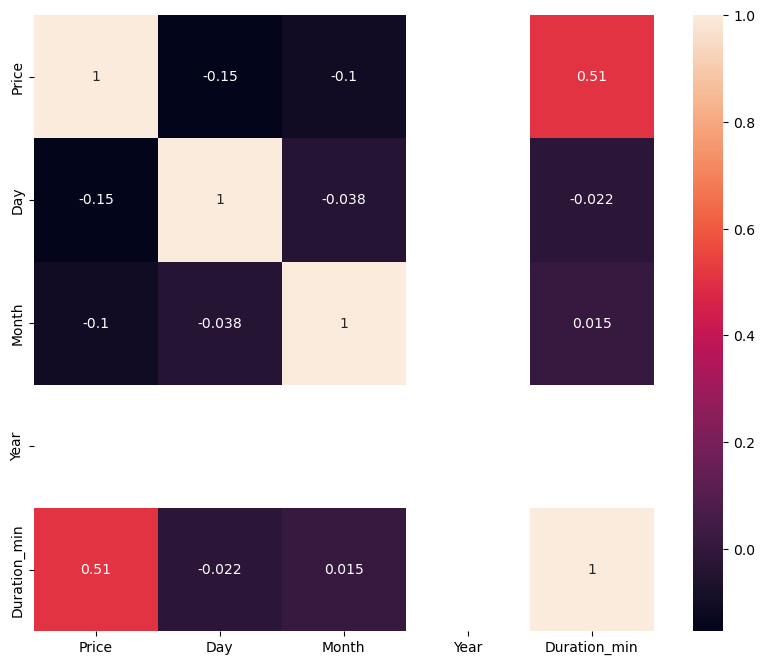

In [34]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [35]:
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'Year'], inplace = True, axis = 1)

### Treating Outliers

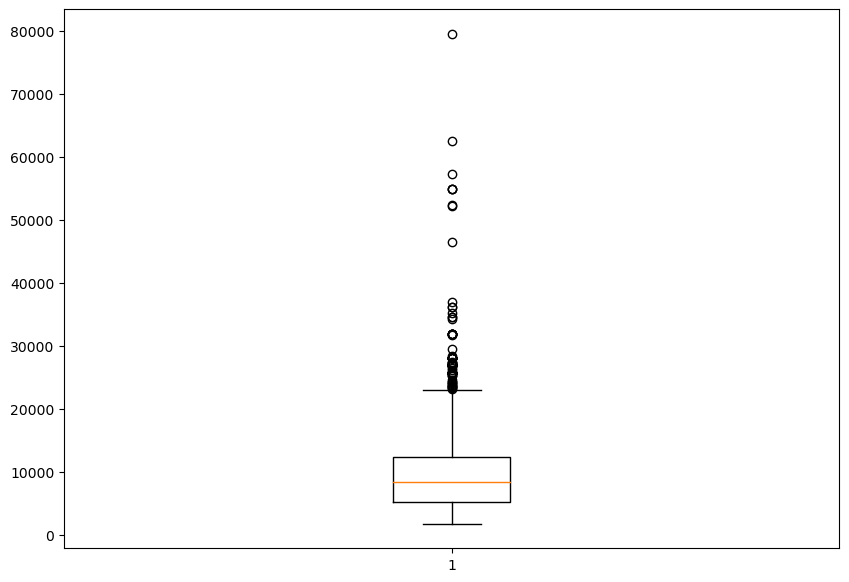

In [36]:
plt.figure(figsize = (10, 7))
plt.boxplot(x = 'Price', data = df)
plt.show()

In [37]:
from scipy import stats
z_score = stats.zscore(df['Price'])
abs_z_score = np.abs(z_score)
filtered = (abs_z_score < 3)
df_new = df[filtered]

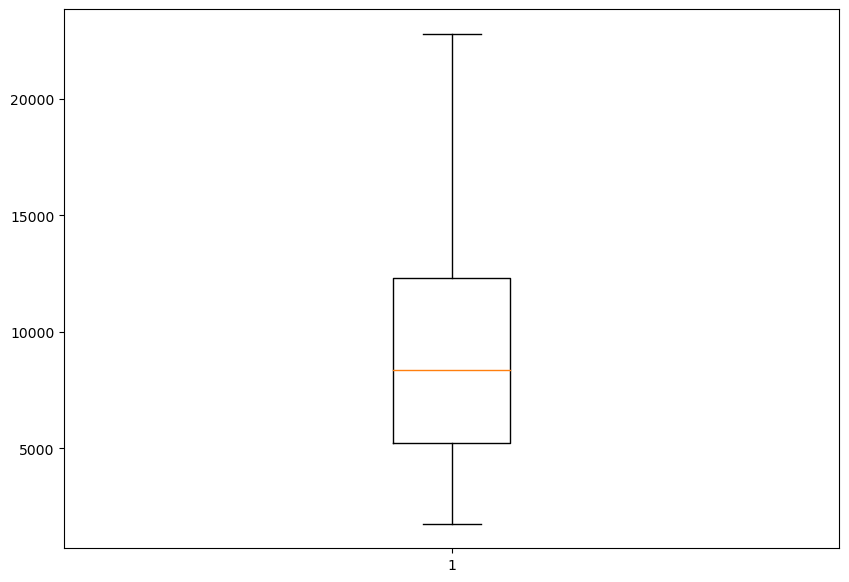

In [38]:
plt.figure(figsize = (10, 7))
plt.boxplot(x = 'Price', data = df_new)
plt.show()

In [39]:
airline_avg_prices_new = df_new.groupby('Airline')['Price'].mean()

for i in airline_avg_prices_new.index:
    avg_price_new = airline_avg_prices_new[i]
    print(f'{i} : {avg_price_new : .2f}')

Air Asia :  5590.26
Air India :  9464.27
GoAir :  5861.06
IndiGo :  5673.68
Jet Airways :  11354.18
Multiple carriers :  10750.91
Multiple carriers Premium economy :  11418.85
SpiceJet :  4315.12
Trujet :  4140.00
Vistara :  7796.35
Vistara Premium economy :  8962.33


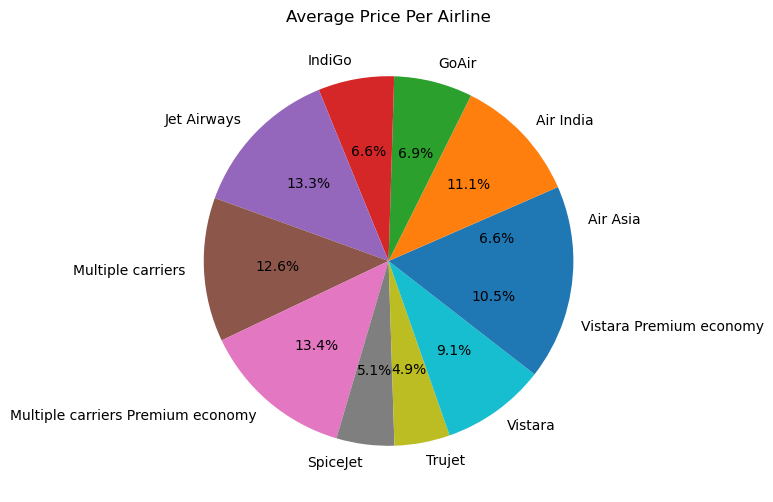

In [40]:
plt.figure(figsize = (10,6))
plt.pie(airline_avg_prices_new, labels = airline_avg_prices_new.index, autopct = '%1.1f%%')
plt.title('Average Price Per Airline')
plt.show()

# As average prices of top 3 airlines won't differ much except indigo by seeing this people are not looking for
# prices they might be looking up for stops, duration and other time efficient services which they are getting from 
# Jet Airways, Indigo and Air India which are top 3 airlines in the data set.

In [41]:
# !pip install xgboost -i https://pypi.tuna.tsinghua.edu.cn/simple

## Importing all algorithms

In [42]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import HuberRegressor
import xgboost as xgb

In [43]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### Encoding Categorical Variables

In [44]:
le = LabelEncoder()

cat_cols = ['Airline', 'Source', 'Destination', 'Route', 'Dep_Period', 'Arr_Period']

for col in cat_cols:
    df_new[col] = le.fit_transform(df_new[col])

In [45]:
X = df_new.drop(['Price'], axis = 1)
Y = df_new['Price']

In [46]:
X

,Airline,Source,Destination,Route,Total_Stops,Day,Month,Dep_Period,Arr_Period,Duration_min
0,3,0,5,18,0,24,3,1,3,170
1,1,3,0,81,2,1,5,2,0,445
2,4,2,1,115,2,9,6,2,2,1140
3,3,3,0,88,1,12,5,1,1,325
4,3,0,5,29,1,1,3,0,1,285
...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,61,0,9,4,1,1,150
10679,1,3,0,61,0,27,4,1,1,155
10680,4,0,2,18,0,27,4,2,2,180
10681,9,0,5,18,0,1,3,2,0,160


In [47]:
Y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10586, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)
# Splitting Dataset for training and testing

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Standardizing dataset

### Training Models 

In [50]:
models = {'Linear Regression' : LinearRegression(),
          'Decision Tree Regressor' : DecisionTreeRegressor(),
          'Random Forest Regressor' : RandomForestRegressor(),
          'Support Vector Regressor' : SVR(),
          'KNeighbors Regressor' : KNeighborsRegressor(),
          'Huber Regressor' : HuberRegressor(),
          'XG Boost' : xgb.XGBRegressor()}

In [51]:
for i,j in models.items():
    j.fit(X_train_scaled, Y_train)
    y_pred = j.predict(X_test_scaled)
    r2 = r2_score(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    print(f'{i}:')
    print(f'R-Squared: {r2:.3f}')
    print(f'Mean Squared Error: {mse:.3f}')
    print(f'Mean Absoulte Error: {mae:.3f}')
    print('=' * 30)
    
# Decision Tree Regressor, Random Forest Regressor and XG Boost Regressor and performing well rather than other models

Linear Regression:
R-Squared: 0.506
Mean Squared Error: 8392718.714
Mean Absoulte Error: 2268.554
Decision Tree Regressor:
R-Squared: 0.706
Mean Squared Error: 4984399.254
Mean Absoulte Error: 1344.842
Random Forest Regressor:
R-Squared: 0.801
Mean Squared Error: 3379599.965
Mean Absoulte Error: 1189.372
Support Vector Regressor:
R-Squared: 0.061
Mean Squared Error: 15945087.621
Mean Absoulte Error: 3290.151
KNeighbors Regressor:
R-Squared: 0.754
Mean Squared Error: 4177574.560
Mean Absoulte Error: 1448.371
Huber Regressor:
R-Squared: 0.486
Mean Squared Error: 8724241.280
Mean Absoulte Error: 2253.808
XG Boost:
R-Squared: 0.858
Mean Squared Error: 2411078.124
Mean Absoulte Error: 1096.230


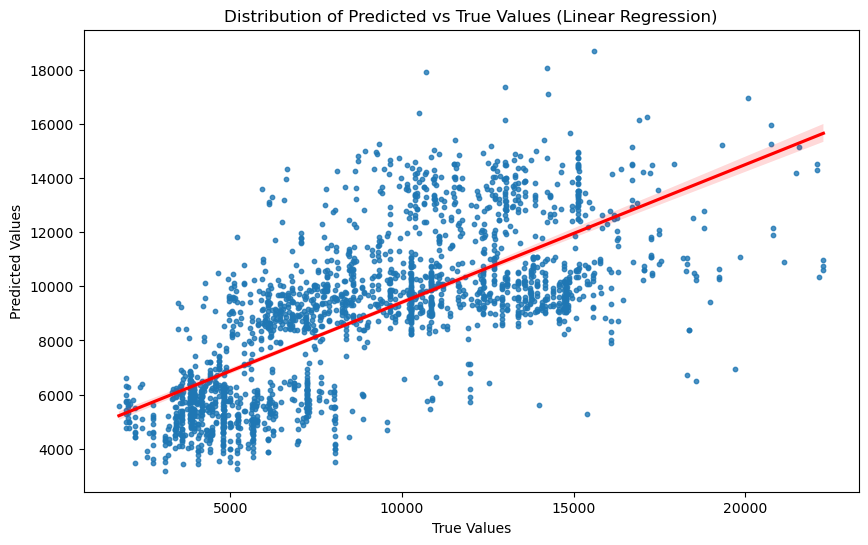

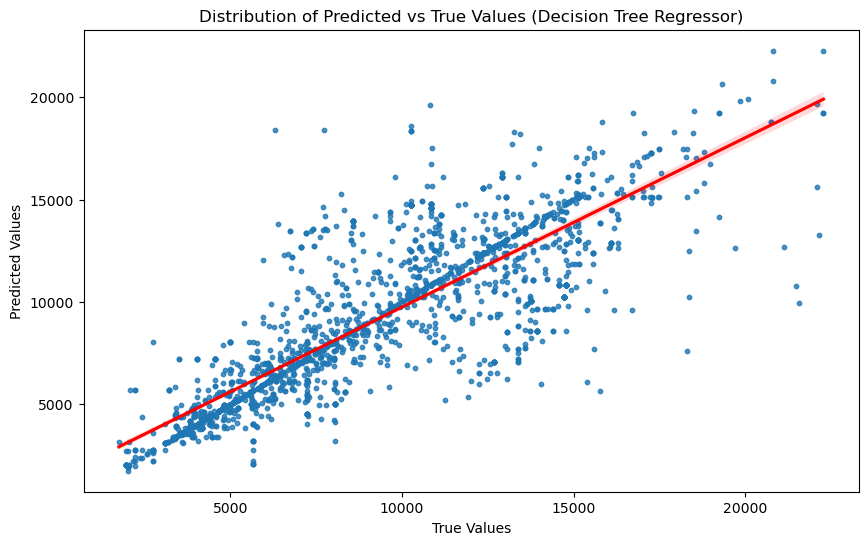

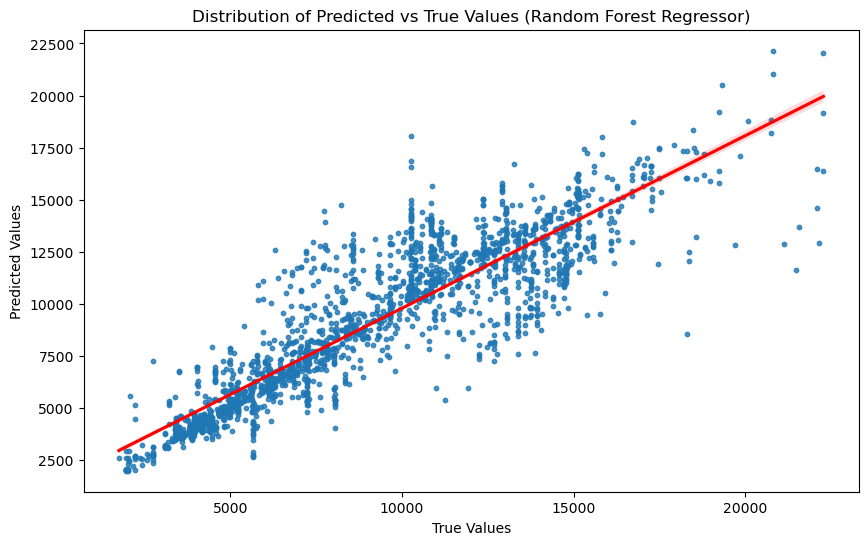

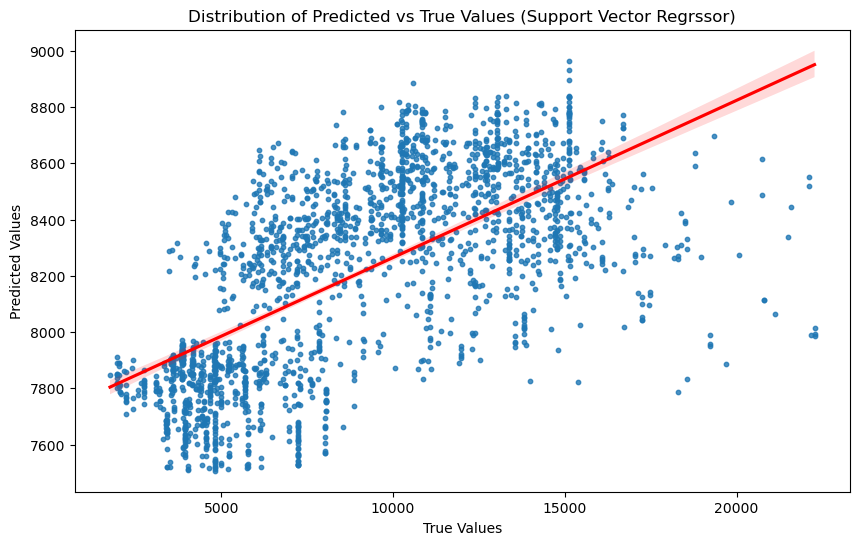

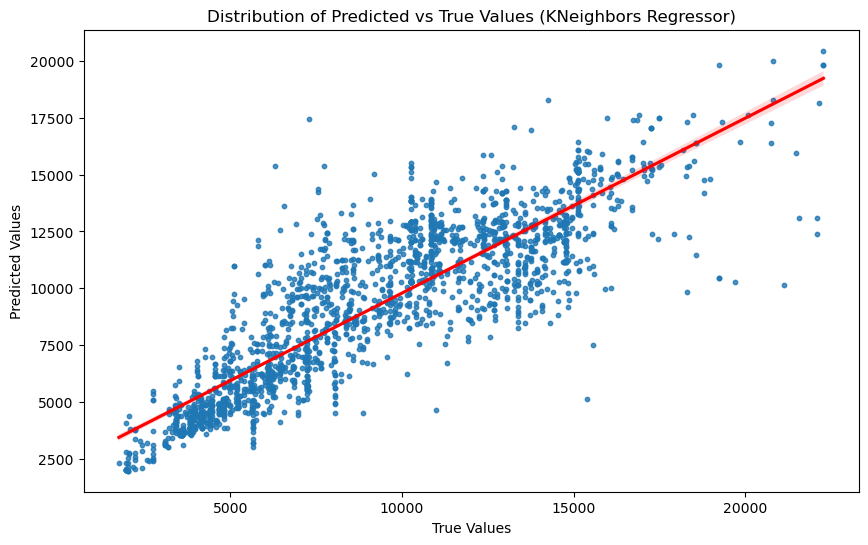

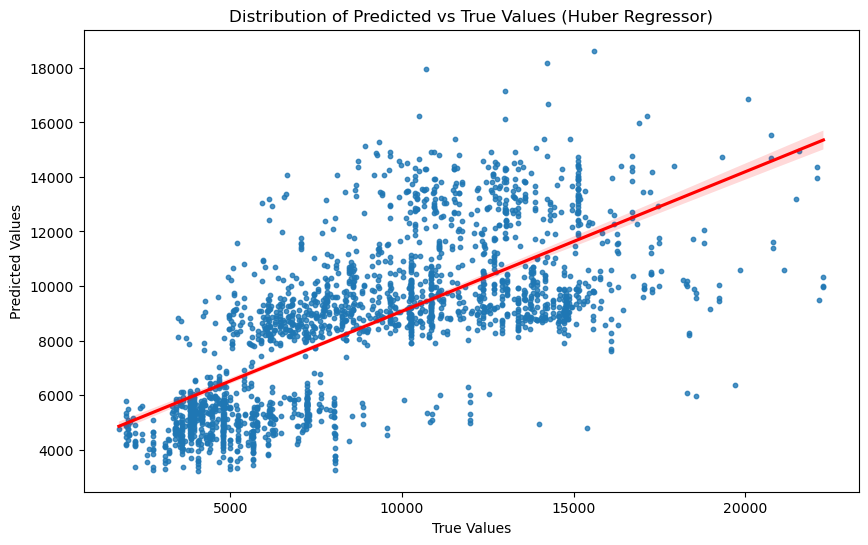

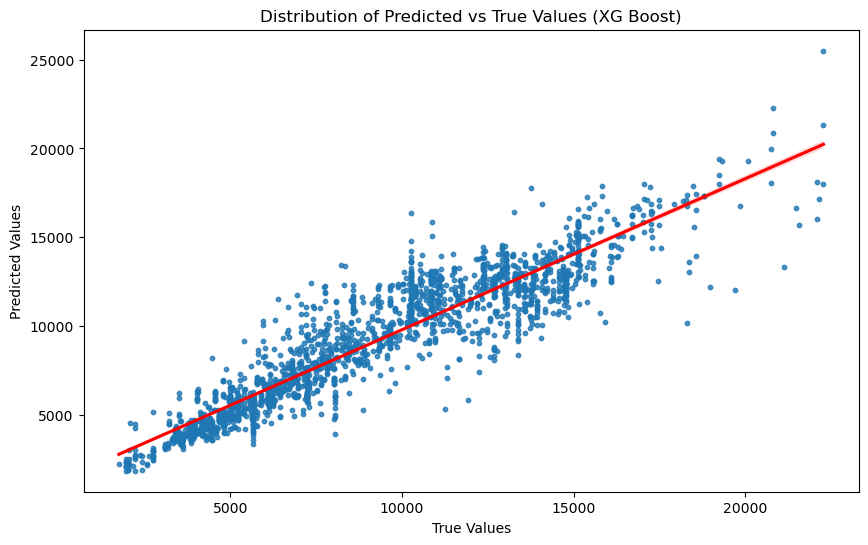

In [52]:
models = {'Linear Regression' : LinearRegression(),
          'Decision Tree Regressor' : DecisionTreeRegressor(),
          'Random Forest Regressor' : RandomForestRegressor(),
          'Support Vector Regrssor' : SVR(),
          'KNeighbors Regressor' : KNeighborsRegressor(),
          'Huber Regressor' : HuberRegressor(),
          'XG Boost' : xgb.XGBRegressor()}

for model_name, model in models.items():

    model.fit(X_train_scaled, Y_train)

    y_pred = model.predict(X_test_scaled)
    
    Y_test = np.array(Y_test).flatten()
    y_pred = np.array(y_pred).flatten()
    data = {'True' : Y_test, 'Pred' : y_pred}
    results = pd.DataFrame(data)
    
    plt.figure(figsize = (10,6))
    sns.regplot(x = 'True', y = 'Pred', data = results, scatter_kws = {'s' : 10}, line_kws = {'color' : 'red'})
    plt.title(f'Distribution of Predicted vs True Values ({model_name})')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.show()

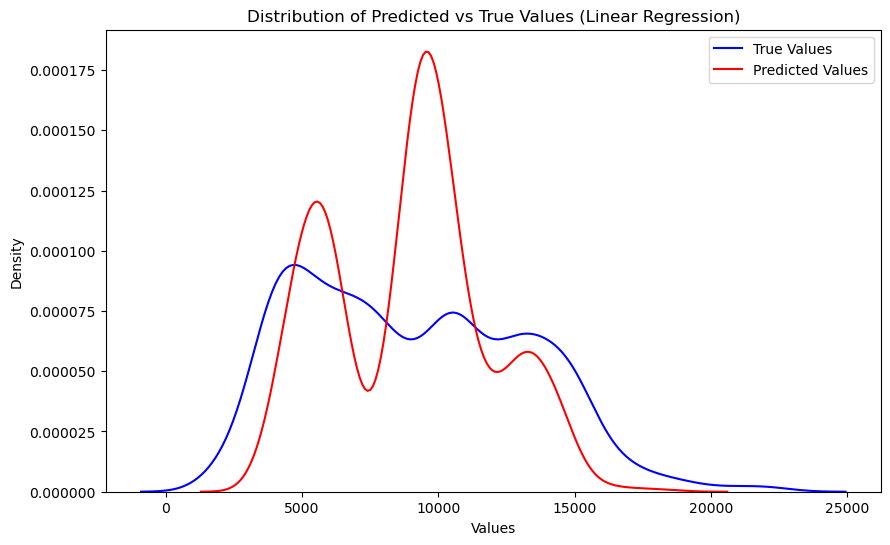

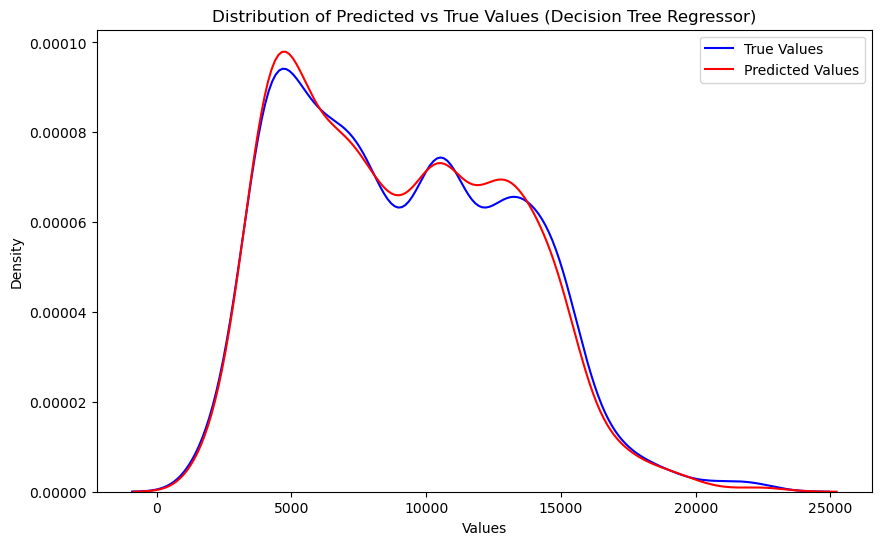

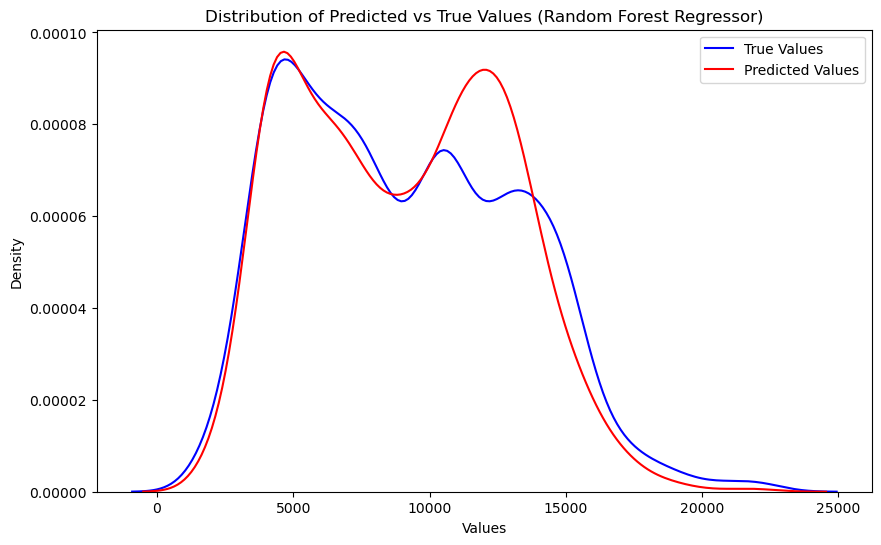

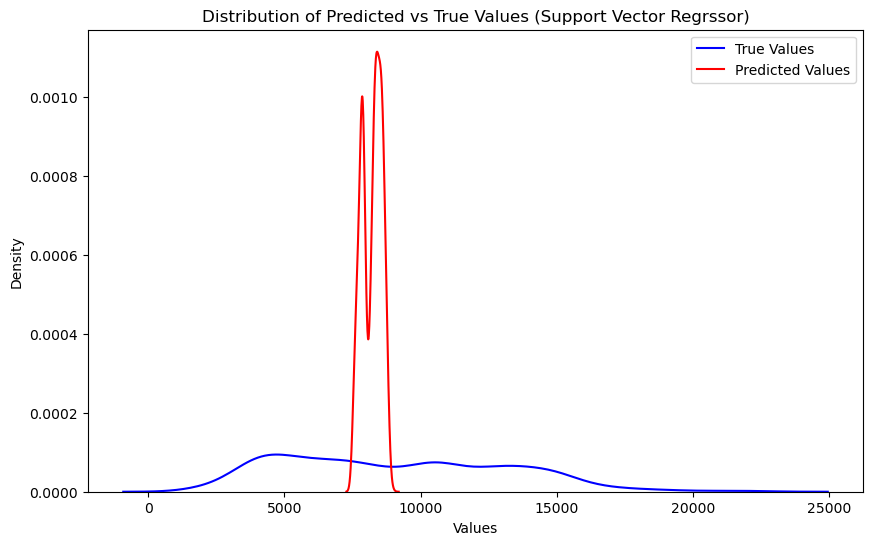

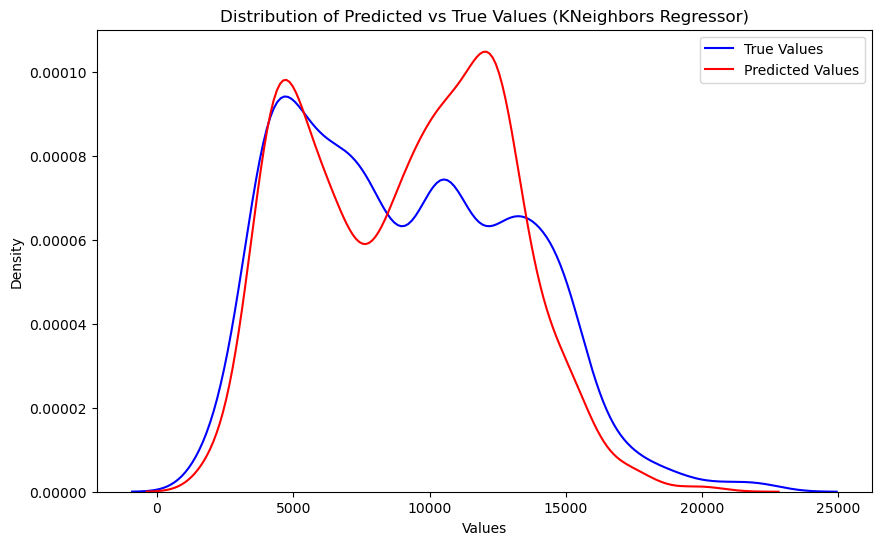

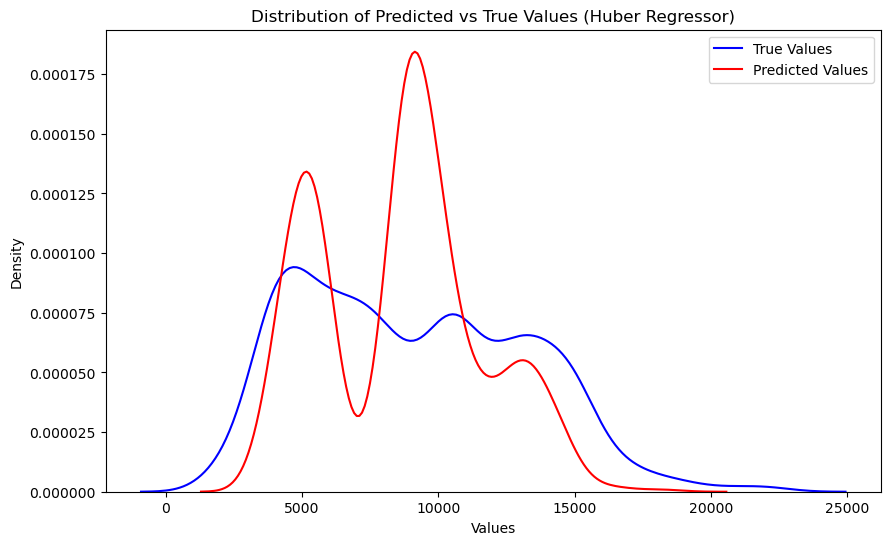

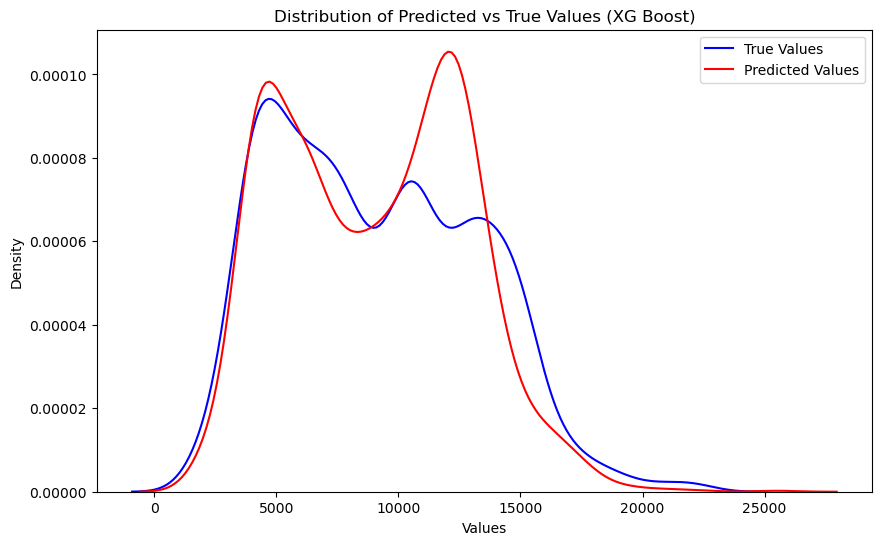

In [53]:
models = {'Linear Regression' : LinearRegression(),
          'Decision Tree Regressor' : DecisionTreeRegressor(),
          'Random Forest Regressor' : RandomForestRegressor(),
          'Support Vector Regrssor' : SVR(),
          'KNeighbors Regressor' : KNeighborsRegressor(),
          'Huber Regressor' : HuberRegressor(),
          'XG Boost' : xgb.XGBRegressor()}

for model_name, model in models.items():

    model.fit(X_train_scaled, Y_train)

    y_pred = model.predict(X_test_scaled)

    plt.figure(figsize=(10, 6))
    sns.kdeplot(Y_test, label='True Values', color='blue')
    sns.kdeplot(y_pred, label='Predicted Values', color='red')
    
    plt.title(f'Distribution of Predicted vs True Values ({model_name})')
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.legend()
    plt.show()